### Help Twitter Combat Hate Speech Using NLP and Machine Learning

#### DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

##### Problem Statement:

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

##### Content:

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

##### Tasks:

1.	Load the tweets file using read_csv function from Pandas package. 
<br>
<br>
2.	Get the tweets into a list for easy text cleanup and manipulation.
<br>
<br>
3.	To cleanup: 
    1.	Normalize the casing.
    2.	Using regular expressions, remove user handles. These begin with '@’.
    3.	Using regular expressions, remove URLs.
    4.	Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    5.	Remove stop words.
    6.	Remove redundant terms like ‘amp’, ‘rt’, etc.
    7.	Remove ‘#’ symbols from the tweet while retaining the term.
<br>
<br>
4.	Extra cleanup by removing terms with a length of 1.
<br>
<br>
5.	Check out the top terms in the tweets:
    1.	First, get all the tokenized terms into one large list.
    2.	Use the counter and find the 10 most common terms.
<br>
<br>
6.	Data formatting for predictive modeling:
    1.	Join the tokens back to form strings. This will be required for the vectorizers.
    2.	Assign x and y.
    3.	Perform train_test_split using sklearn.
<br>
<br>
7.	We’ll use TF-IDF values for the terms as a feature to get into a vector space model.
    1.	Import TF-IDF  vectorizer from sklearn.
    2.	Instantiate with a maximum of 5000 terms in your vocabulary.
    3.	Fit and apply on the train set.
    4.	Apply on the test set.
<br>
<br>
8.	Model building: Ordinary Logistic Regression
    1.	Instantiate Logistic Regression from sklearn with default parameters.
    2.	Fit into  the train data.
    3.	Make predictions for the train and the test set.
<br>
<br>
9.	Model evaluation: Accuracy, recall, and f_1 score.
    1.	Report the accuracy on the train set.
    2.	Report the recall on the train set: decent, high, or low.
    3.	Get the f1 score on the train set.
<br>
<br>
10.	Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
    1.	Adjust the appropriate class in the LogisticRegression model.
<br>
<br>
11.	Train again with the adjustment and evaluate.
    1.	Train the model on the train set.
    2.	Evaluate the predictions on the train set: accuracy, recall, and f_1 score.
<br>
<br>
12.	Regularization and Hyperparameter tuning:
    1.	Import GridSearch and StratifiedKFold because of class imbalance.
    2.	Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
    3.	Use a balanced class weight while instantiating the logistic regression.
<br>
<br>
13.	Find the parameters with the best recall in cross validation.
    1.	Choose ‘recall’ as the metric for scoring.
    2.	Choose stratified 4 fold cross validation scheme.
    3.	Fit into  the train set.
<br>
<br>
14.	What are the best parameters?
<br>
<br>
15.	Predict and evaluate using the best estimator.
    1.	Use the best estimator from the grid search to make predictions on the test set.
    2.	What is the recall on the test set for the toxic comments?
    3.	What is the f_1 score?

In [1]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

# other modules and libraries will be imported as and when they are required 

##### Tasks:

1.	Load the tweets file using read_csv function from Pandas package. 

In [2]:
tweets = pd.read_csv\
(r"D:\Simplilearn\06 Natural Language Processing\Assignment\TwitterHate.csv")

print("Tweets dataset shape : ",tweets.shape)

Tweets dataset shape :  (31962, 3)


In [3]:
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### Text Pre-Processing

##### Tasks:

2.	Get the tweets into a list for easy text cleanup and manipulation.

In [4]:
# apply the tweets to a list
tweet_list = tweets.tweet.values
tweet_list

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

##### Tasks:

3.	To cleanup: 
    1.	Normalize the casing.
    2.	Using regular expressions, remove user handles. These begin with '@’.
    3.	Using regular expressions, remove URLs.
    4.	Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    5.	Remove stop words.
    6.	Remove redundant terms like ‘amp’, ‘rt’, etc.
    7.	Remove ‘#’ symbols from the tweet while retaining the term.

In [5]:
# convert all tweet content into lower case
[twt.lower() for twt in tweet_list]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [6]:
# there are a lot of diacritic letters (characters with accents, eg: â, è)
print(tweet_list[8],'\n')
print(tweet_list[10],'\n')
print(tweet_list[26])

we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦  

 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex 

 @user all #smiles when #media is   !! ðð #pressconference in #antalya #turkey ! sunday #throwback  love! ððâ¤ï¸ 


In [7]:
# so let's handle them using a text normalization function
# thanks to: https://www.kaggle.com/prakharprasad/twitter-hate-speech-classification

def simplify(text):
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

# apply the normalization
map(simplify, tweet_list)
tweet_list

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

In [8]:
# however it doesn't seem to have done much to remove the diacritic letters? :(
print(tweet_list[8],'\n')
print(tweet_list[10],'\n')
print(tweet_list[26])

we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦  

 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex 

 @user all #smiles when #media is   !! ðð #pressconference in #antalya #turkey ! sunday #throwback  love! ððâ¤ï¸ 


In [9]:
# so let's just proceed to the next pre-processing steps
# let's start having a quick look at how the characters of the tweets look like, and therefore what to remove:
print(tweet_list[1],'\n')
print(tweet_list[7])

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl


In [10]:
# now to use RegEx to clean out the words:

# remove @twitter_usernames
tweet_list = [re.sub("@\w+","",twt) for twt in tweet_list]
# \w (lowercase w) matches word characters or underscores [a-z,A-Z,0-9,_]
# + (1) or more occurrences of the pattern to its left, e.g. 'i+' = one or more i's

# remove any URL links
tweet_list = [re.sub("\w+://\S+","",twt) for twt in tweet_list]
# \w (lowercase w) matches word characters or underscores [a-z,A-Z,0-9,_]
# \S (upper case S) matches any non-whitespace character

# remove all non-word characters (leaves in numbers)
# this step also removes # from the hash-tagged words but leaves in the words
tweet_list = [re.sub("[^a-zA-Z]"," ",twt) for twt in tweet_list]

In [11]:
# text is now looking much better/cleaner
print(tweet_list[1],'\n')
print(tweet_list[7],'\n')
print(tweet_list[8],'\n')
print(tweet_list[10],'\n')
print(tweet_list[26])

  thanks for  lyft credit i can t use cause they don t offer wheelchair vans in pdx      disapointed  getthanked 

the next school year is the year for exams      can t think about that       school  exams    hate  imagine  actorslife  revolutionschool  girl 

we won    love the land     allin  cavs  champions  cleveland  clevelandcavaliers       

      ireland consumer price index  mom  climbed from previous      to      in may    blog  silver  gold  forex 

  all  smiles when  media is                pressconference in  antalya  turkey   sunday  throwback  love                 


In [12]:
# tokenize each tweet into a list (of lists)
from nltk.tokenize import TweetTokenizer
tkn = TweetTokenizer()
tokenized_tweets = [tkn.tokenize(sent) for sent in tweet_list]
tokenized_tweets

[['when',
  'a',
  'father',
  'is',
  'dysfunctional',
  'and',
  'is',
  'so',
  'selfish',
  'he',
  'drags',
  'his',
  'kids',
  'into',
  'his',
  'dysfunction',
  'run'],
 ['thanks',
  'for',
  'lyft',
  'credit',
  'i',
  'can',
  't',
  'use',
  'cause',
  'they',
  'don',
  't',
  'offer',
  'wheelchair',
  'vans',
  'in',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'your', 'majesty'],
 ['model',
  'i',
  'love',
  'u',
  'take',
  'with',
  'u',
  'all',
  'the',
  'time',
  'in',
  'ur'],
 ['factsguide', 'society', 'now', 'motivation'],
 ['huge',
  'fan',
  'fare',
  'and',
  'big',
  'talking',
  'before',
  'they',
  'leave',
  'chaos',
  'and',
  'pay',
  'disputes',
  'when',
  'they',
  'get',
  'there',
  'allshowandnogo'],
 ['camping', 'tomorrow', 'danny'],
 ['the',
  'next',
  'school',
  'year',
  'is',
  'the',
  'year',
  'for',
  'exams',
  'can',
  't',
  'think',
  'about',
  'that',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'r

In [13]:
#find all redundant words of length 2 or 3
redundant_search = []

for j in tokenized_tweets:
    length_j = [i for i in j if len(i)>1 and len(i)<4]
    redundant_search.append(length_j)

redundant_search

[['is', 'and', 'is', 'so', 'he', 'his', 'his', 'run'],
 ['for', 'can', 'use', 'don', 'in', 'pdx'],
 [],
 ['all', 'the', 'in', 'ur'],
 ['now'],
 ['fan', 'and', 'big', 'and', 'pay', 'get'],
 [],
 ['the', 'is', 'the', 'for', 'can'],
 ['we', 'won', 'the'],
 ['it', 'so', 'gr'],
 ['mom', 'to', 'in', 'may'],
 ['we', 'are', 'so'],
 ['get', 'to', 'see', 'my'],
 ['cnn', 'the'],
 ['no', 'in'],
 ['is', 'got', 'omg'],
 ['am', 'for'],
 ['if', 'you'],
 ['its', 'all', 'via', 'ig'],
 ['as', 'we', 'all', 'are', 'not', 'of'],
 ['ha', 'for', 'was', 'it', 'fat', 'who', 'can', 'hit'],
 ['sad'],
 ['of', 'the', 'day', 'man', 'who', 'it', 'the', 'to', 'up', 'amp', 'up'],
 ['am', 'it'],
 ['ff', 'to', 'my'],
 ['by', 'for'],
 ['all', 'is', 'in'],
 ['we', 'had', 'on', 'the', 'of', 'the', 'ica'],
 ['day'],
 ['to', 'to', 'and', 'man', 'are', 'to', 'rip'],
 ['had', 'to', 'for', 'was', 'and', 'to', 'be', 'no'],
 ['not'],
 ['rip', 'to', 'the', 'fan', 'who', 'and', 'on'],
 ['it', 'was', 'due', 'to', 'for'],
 ['it', 'in'

In [14]:
# from the redundant word search, identify all unique variations and then select words with no clear english definition
# these words will then be added to our stoplist (see below)

unique_redundant = []
for firstList in redundant_search:
    for item in firstList:
        if item not in unique_redundant:
            unique_redundant.append(item)
            
unique_redundant.sort()
unique_redundant

['aa',
 'aaa',
 'aah',
 'aal',
 'aap',
 'ab',
 'aba',
 'abc',
 'abd',
 'abe',
 'abg',
 'abi',
 'abk',
 'abo',
 'abs',
 'abt',
 'abu',
 'ac',
 'acc',
 'ace',
 'act',
 'acu',
 'ad',
 'adc',
 'add',
 'ade',
 'adl',
 'adn',
 'ads',
 'adv',
 'ae',
 'aed',
 'aer',
 'aes',
 'af',
 'afb',
 'afc',
 'aff',
 'afl',
 'afp',
 'aft',
 'ag',
 'aga',
 'age',
 'agn',
 'ago',
 'agp',
 'agr',
 'agt',
 'ah',
 'ahh',
 'aho',
 'ahs',
 'aht',
 'ai',
 'aic',
 'aid',
 'aim',
 'ain',
 'air',
 'aj',
 'aja',
 'ak',
 'aka',
 'akf',
 'ako',
 'al',
 'alc',
 'ale',
 'ali',
 'all',
 'alt',
 'alw',
 'aly',
 'am',
 'amk',
 'amo',
 'amp',
 'amr',
 'amy',
 'an',
 'ana',
 'anc',
 'and',
 'anf',
 'ang',
 'ans',
 'ant',
 'any',
 'anz',
 'aoa',
 'aol',
 'ap',
 'apa',
 'apc',
 'ape',
 'api',
 'apk',
 'app',
 'apt',
 'ar',
 'arc',
 'are',
 'arg',
 'ark',
 'arm',
 'arn',
 'arr',
 'as',
 'asd',
 'asf',
 'ash',
 'ask',
 'asl',
 'aso',
 'ass',
 'asx',
 'at',
 'ate',
 'atk',
 'atl',
 'atm',
 'atp',
 'atx',
 'au',
 'aub',
 'aud',
 'a

In [15]:
# import and initialize stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = stopwords.words('english')

# add additional redundant words to the stoplist, as taken from unique_redundant
additional_list = ['amp','rt','u','ur', 'omg', 'aap', 'rb','ica','blk','cds','las',\
                   'hea','chi','cpd','bgp','vot','lef','xo','hu','hea','ork','tma',\
                   'jkt','tru','5b','xxx','gt','bhl','mxm','loa','eia','usn','sta',\
                   'amp','soa','ze','ziy','jax','wah','sta','up2','woh','c2c','pcn',\
                   'xd','dal','bei','mi','hea','lfc','jts','dnd','rul','san','mkf',\
                   'ewa','coc','hrc','ta','imy','xx','gdt','udt','sta']

for words in additional_list:
    stops.append(words)
    
# now to filter out the stopwords + the added redundant terms        
# since we tokenized the tweets earlier, we have to run a for loop
# through a list of lists, hence we nest another for loop inside
stopsFiltered = []

for w in tokenized_tweets:
    stop_w = [i for i in w if str(i) not in stops]
    stopsFiltered.append(stop_w)

stopsFiltered

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brianlimcn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'take', 'time'],
 ['factsguide', 'society', 'motivation'],
 ['huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  'chaos',
  'pay',
  'disputes',
  'get',
  'allshowandnogo'],
 ['camping', 'tomorrow', 'danny'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  'think',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['love',
  'land',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers'],
 ['welcome', 'gr'],
 ['ireland',
  'consumer',
  'price',
  'index',
  'mom',
  'climbed',
  'previous',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  

##### Tasks:

4.	Extra cleanup by removing terms with a length of 1.

In [16]:
# similarly to the stopword removal, we need to run through a list of lists when iterating for length !=1
lengthFiltered = []

for j in stopsFiltered:
    length_j = [i for i in j if len(i) != 1]
    lengthFiltered.append(length_j)

lengthFiltered

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'take', 'time'],
 ['factsguide', 'society', 'motivation'],
 ['huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  'chaos',
  'pay',
  'disputes',
  'get',
  'allshowandnogo'],
 ['camping', 'tomorrow', 'danny'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  'think',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['love',
  'land',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers'],
 ['welcome', 'gr'],
 ['ireland',
  'consumer',
  'price',
  'index',
  'mom',
  'climbed',
  'previous',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  

### Exploratory Data Analysis

##### Tasks:

5.	Check out the top terms in the tweets:
    1.	First, get all the tokenized terms into one large list.
    2.	Use the counter and find the 10 most common terms.

In [17]:
# we start by returning our lengthFiltered list back to the original tweets dataframe to match with the 'label' feature

# if condition is to ensure that the length of the two data we are joining are the same before proceeding
if len(lengthFiltered) == len(tweets):
    tweets_cleaned = tweets
    tweets_cleaned['cleaned_tweets'] = lengthFiltered
tweets_cleaned

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, take, time]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,"[ate, isz, youuu]"
31958,31959,0,to see nina turner on the airwaves trying to...,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,31960,0,listening to sad songs on a monday morning otw...,"[listening, sad, songs, monday, morning, otw, ..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[sikh, temple, vandalised, calgary, wso, conde..."


In [18]:
# join all words within each of the rows of column 'cleaned_tweets'
tweets_cleaned_2 = tweets_cleaned.assign(joined_tweets=tweets_cleaned.cleaned_tweets.map(' '.join))
tweets_cleaned_2

,id,label,tweet,cleaned_tweets,joined_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ...",father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, use, cause, offer, whee...",thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,"[bihday, majesty]",bihday majesty
3,4,0,#model i love u take with u all the time in ...,"[model, love, take, time]",model love take time
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]",factsguide society motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,"[ate, isz, youuu]",ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,"[see, nina, turner, airwaves, trying, wrap, ma...",see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,"[listening, sad, songs, monday, morning, otw, ...",listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[sikh, temple, vandalised, calgary, wso, conde...",sikh temple vandalised calgary wso condemns act


In [19]:
# remove unecessary columns
tweets_cleaned_2.drop(['id', 'tweet', 'cleaned_tweets'], axis=1, inplace=True)
tweets_cleaned_2

,label,joined_tweets
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [20]:
# now that we have our consolidated dataset, let's explore how the data is like

# first let's investigate the 'label' feature. 'normalize=True' gives the percentage
labels_count = tweets_cleaned_2.label.value_counts()
labels_count_perc = tweets_cleaned_2.label.value_counts(normalize=True)

print(labels_count,'\n')
print(labels_count_perc,'\n')

print("We can see that 93% of 'label' data is marked as'0' for non-hate speech")

0    29720
1     2242
Name: label, dtype: int64 

0    0.929854
1    0.070146
Name: label, dtype: float64 

We can see that 93% of 'label' data is marked as'0' for non-hate speech


In [21]:
# then we observe what is the top 10 most common words in all tweets

from collections import Counter
Counter(" ".join(tweets_cleaned_2["joined_tweets"]).split()).most_common(10)

[('love', 2828),
 ('day', 2393),
 ('happy', 1707),
 ('like', 1180),
 ('life', 1176),
 ('time', 1150),
 ('today', 1095),
 ('new', 1003),
 ('thankful', 952),
 ('positive', 937)]

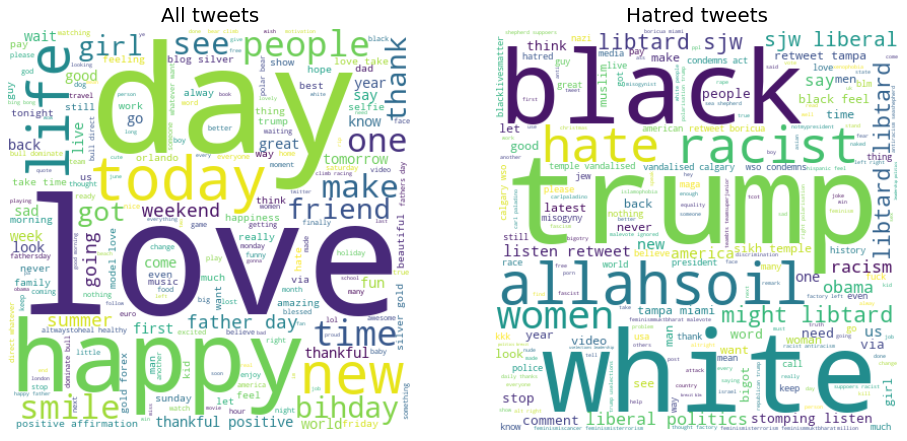

In [22]:
# as an extra, let's visualize the top 10 most common words among 'all tweets' and only 'hatred tweets'

import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join(tweets_cleaned_2.joined_tweets.values)
hatred_words = ' '.join(tweets_cleaned_2[tweets_cleaned_2.label == 1].joined_tweets.values)

plt.figure(figsize=(16, 8))

cloud1 = WordCloud(width=400, height=400, background_color='white').generate(all_words)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('All tweets', size=20)

cloud2 = WordCloud(width=400, height=400, background_color='white').generate(hatred_words)
plt.subplot(122)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Hatred tweets', size=20)
plt.show()

# thanks to: (https://www.kaggle.com/niki12345/detecting-hate-tweets) for this

##### Tasks:

6.	Data formatting for predictive modeling:
    1.	Join the tokens back to form strings. This will be required for the vectorizers.
    2.	Assign x and y.
    3.	Perform train_test_split using sklearn.

In [23]:
# the data was already joined back into strings in step 5, so let's just rename the data for clarity:
tweets_cleaned_2.rename(columns={'joined_tweets': 'final_clean_tweets'}, inplace=True)
tweets_cleaned_2

,label,final_clean_tweets
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [24]:
# performing train-test-split

from sklearn.model_selection import train_test_split
seed = 42

X = tweets_cleaned_2.final_clean_tweets
Y = tweets_cleaned_2.label

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

##### Tasks:

7.	We’ll use TF-IDF values for the terms as a feature to get into a vector space model.
    1.	Import TF-IDF  vectorizer from sklearn.
    2.	Instantiate with a maximum of 5000 terms in your vocabulary.
    3.	Fit and apply on the train set.
    4.	Apply on the test set.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfVectorizer(max_features=5000)

In [26]:
# fit on the training data
x_train = vectorizer.fit_transform(x_train)
# apply on the test data
x_test = vectorizer.transform(x_test)

#explanation:
#https://stats.stackexchange.com/questions/154660/tfidfvectorizer-should-it-be-used-on-train-only-or-traintest

In [27]:
#check the shape
x_train.shape, x_test.shape

((25569, 5000), (6393, 5000))

### Modeling: Logistic Regression

#### Model Evaluation

##### Tasks:

9.	Model evaluation: Accuracy, recall, and f_1 score.
    1.	Report the accuracy on the train set.
    2.	Report the recall on the train set: decent, high, or low.
    3.	Get the f1 score on the train set.
<br>
<br>
8.	Model building: Ordinary Logistic Regression
    1.	Instantiate Logistic Regression from sklearn with default parameters.
    2.	Fit into  the train data.
    3.	Make predictions for the train and the test set.

In [28]:
from sklearn.linear_model import LogisticRegression

#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(x_train,y_train)

# predict 
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Accuracy measures how good our model can correctly predict classifications.
# Precision measures how good our model is when the prediction is positive.
# Recall measures how good our model is at correctly predicting positive classes.
# F1_score is the weighted average of precision and recall.

In [30]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %0.2f%%' %(accuracy_score(y_train,train_predictions)*100))
print('Accuracy Score on test set %0.2f%%' %(accuracy_score(y_test,test_predictions)*100))

Accuracy Score on training set 95.64%
Accuracy Score on test set 95.09%


In [31]:
print('Model accuracy appears to be very high, but this score is not enough to evaluate our model, as in our previous step we already found that 93% of "label" data is marked as "0" for hate speech.','\n')

print('This means there already existed a class imbalance between positive (1) and negative (0) classes. Therefore, we need other measures like precision and recall to evaluate our model')

Model accuracy appears to be very high, but this score is not enough to evaluate our model, as in our previous step we already found that 93% of "label" data is marked as "0" for hate speech. 

This means there already existed a class imbalance between positive (1) and negative (0) classes. Therefore, we need other measures like precision and recall to evaluate our model


In [32]:
print('Classification Report Training set','\n')
print(classification_report(y_train,train_predictions),'\n','\n')

print('Classification Report Testing set','\n')
print(classification_report(y_test,test_predictions))


# we'll also save the accuracy and classification reports for later comparison
ACC_Model_0_train = accuracy_score(y_train,train_predictions)
OLR_Model_0_train = classification_report(y_train,train_predictions)
ACC_Model_0_test = accuracy_score(y_test,test_predictions)
OLR_Model_0_test = classification_report(y_test,test_predictions)

Classification Report Training set 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23783
           1       0.95      0.40      0.56      1786

    accuracy                           0.96     25569
   macro avg       0.95      0.70      0.77     25569
weighted avg       0.96      0.96      0.95     25569
 
 

Classification Report Testing set 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



In [33]:
print('In our classification report for the train set, we observe that recall on 1 (hate speech) is low at just 40% (0.4), which indicates that our model is not very good at capturing all instances where a tweet SHOULD be classified as hate speech')

In our classification report for the train set, we observe that recall on 1 (hate speech) is low at just 40% (0.4), which indicates that our model is not very good at capturing all instances where a tweet SHOULD be classified as hate speech


In [34]:
print("Nontheless, our model's precision is high. This indicates that out of the total group of hate tweets predicted by the model, 95% were correctly identified as truly being a hate-tweet. The high precision but low recall therefore indicates that there are quite a large number of false positives identified in this model")

Nontheless, our model's precision is high. This indicates that out of the total group of hate tweets predicted by the model, 95% were correctly identified as truly being a hate-tweet. The high precision but low recall therefore indicates that there are quite a large number of false positives identified in this model


In [35]:
print("Due to this low recall score, our model's f-1 score is also low, since f-1 score is a weighted average of precision and recall")

Due to this low recall score, our model's f-1 score is also low, since f-1 score is a weighted average of precision and recall


##### Tasks:

10.	Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
    1.	Adjust the appropriate class in the LogisticRegression model.
<br>
<br>
11.	Train again with the adjustment and evaluate.
    1.	Train the model on the train set.
    2.	Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

##### class_weight = 'balanced'

In [36]:
#instantiate the models and apply the 'balanced' parameter 
clf = LogisticRegression(class_weight='balanced')
clf.fit(x_train,y_train)

# predict 
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

# report
print('Classification Report Training set','\n')
print(classification_report(y_train,train_predictions),'\n','\n')
print('Classification Report Testing set','\n')
print(classification_report(y_test,test_predictions))

# save
ACC_Model_Balanced_train = accuracy_score(y_train,train_predictions)
OLR_Model_Balanced_train = classification_report(y_train,train_predictions)
ACC_Model_Balanced_test = accuracy_score(y_test,test_predictions)
OLR_Model_Balanced_test = classification_report(y_test,test_predictions)

Classification Report Training set 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23783
           1       0.57      0.97      0.72      1786

    accuracy                           0.95     25569
   macro avg       0.78      0.96      0.84     25569
weighted avg       0.97      0.95      0.95     25569
 
 

Classification Report Testing set 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.47      0.80      0.59       456

    accuracy                           0.92      6393
   macro avg       0.73      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393



##### class_weight = weights

In [37]:
# Let's try a second more 'manual' method, which is to self-calculate the weights
# Earlier, we saw the following imbalance in the raw dataset:
labels_count

# The minority to majority class ratio is therefore 1:13.25

0    29720
1     2242
Name: label, dtype: int64

In [38]:
# define the weight of the class labels using inverse ratio. This gives a slightly better output vs class_weight='balanced'
# see: https://stackoverflow.com/questions/62396452/logistic-regression-class-weight-balanced-vs-dict-argument
weights = {0:1.00,1:13.25}

#instantiate the models and apply new weights
clf = LogisticRegression(class_weight=weights)
clf.fit(x_train,y_train)

# predict 
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

# report
print('Classification Report Training set','\n')
print(classification_report(y_train,train_predictions),'\n','\n')
print('Classification Report Testing set','\n')
print(classification_report(y_test,test_predictions))

# This is the better model between class_weight = 'balanced' and class_weight = weights
# we will save it for later comparisons
ACC_Model_Weighted_train = accuracy_score(y_train,train_predictions)
OLR_Model_Weighted_train = classification_report(y_train,train_predictions)
ACC_Model_Weighted_test = accuracy_score(y_test,test_predictions)
OLR_Model_Weighted_test = classification_report(y_test,test_predictions)

Classification Report Training set 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23783
           1       0.60      0.98      0.74      1786

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569
 
 

Classification Report Testing set 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.47      0.80      0.59       456

    accuracy                           0.92      6393
   macro avg       0.73      0.87      0.78      6393
weighted avg       0.95      0.92      0.93      6393



In [39]:
# Let's evaluate the scores of our initial Default Model vs our new Weighted Model:

print('Classification Report Training set - Default Model','\n')
print(OLR_Model_0_train)
print('Default Model Accuracy: %0.2f%%' %(ACC_Model_0_train*100),'\n','\n')


print('Classification Report Training set - Weighted Model','\n')
print(OLR_Model_Weighted_train)
print('Balanced Weights Model Accuracy: %0.2f%%' %(ACC_Model_Weighted_train*100))

Classification Report Training set - Default Model 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23783
           1       0.95      0.40      0.56      1786

    accuracy                           0.96     25569
   macro avg       0.95      0.70      0.77     25569
weighted avg       0.96      0.96      0.95     25569

Default Model Accuracy: 95.64% 
 

Classification Report Training set - Weighted Model 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23783
           1       0.60      0.98      0.74      1786

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569

Balanced Weights Model Accuracy: 95.23%


In [40]:
print("With our Balanced Weights, we can observe a strong improvement our model's recall and f1-score for class 1 (hate-speech) classifications, though at the expense of a drop in precision. This means that our new model is better at identifying an individual hate speech tweet correctly, but is not as good as identifying the total number of hate speech tweets in the whole dataset. Meanwhile, our accuracy score remains largely the same",'\n')
print("On the whole, our model is thus performing better with the weights")

With our Balanced Weights, we can observe a strong improvement our model's recall and f1-score for class 1 (hate-speech) classifications, though at the expense of a drop in precision. This means that our new model is better at identifying an individual hate speech tweet correctly, but is not as good as identifying the total number of hate speech tweets in the whole dataset. Meanwhile, our accuracy score remains largely the same 

On the whole, our model is thus performing better with the weights


##### Tasks:

12.	Regularization and Hyperparameter tuning:
    1.	Import GridSearch and StratifiedKFold because of class imbalance.
    2.	Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
    3.	Use a balanced class weight while instantiating the logistic regression.
<br>
<br>
13.	Find the parameters with the best recall in cross validation.
    1.	Choose ‘recall’ as the metric for scoring.
    2.	Choose stratified 4 fold cross validation scheme.
    3.	Fit into  the train set.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [42]:
# define parameter search space
from scipy.stats import loguniform

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100) # This will create random variables evenly spaced between 0.00001 and 100

# solver: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions
# C: https://newbedev.com/how-do-i-generate-log-uniform-distribution-in-python

print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A033579730>}


In [43]:
# instantiate the models and apply the 'balanced' parameter for this round according to the assignment tasks
clf = LogisticRegression(class_weight='balanced')

# define number of folds
folds = StratifiedKFold(n_splits=4)

# define search
grid_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=space, 
    n_iter=100, 
    scoring='recall', 
    n_jobs=-1, 
    cv=folds, 
    random_state=seed)

#fit grid search on the train data
grid_result = grid_search.fit(x_train,y_train)

##### Tasks:

14.	What are the best parameters?

In [44]:
# retrieve the best model parameters given class_weights = 'balanced' 
print(grid_result.best_estimator_,'\n')
print(grid_result.best_params_,'\n')
print(grid_result.best_score_)

LogisticRegression(C=0.7302886168766703, class_weight='balanced') 

{'C': 0.7302886168766703, 'penalty': 'l2', 'solver': 'lbfgs'} 

0.7827519788124117


In [45]:
# However, earlier we found that using class_weight = weights gave a better recall score. So let's run the Gridsearch with 
# these "weights" updated in the regression 

weights = {0:1.00,1:13.25}

# instantiate the models and apply our custom weights 
clf = LogisticRegression(class_weight=weights)

# define number of folds
folds = StratifiedKFold(n_splits=4)

# define search
grid_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=space, 
    n_iter=100, 
    scoring='recall', 
    n_jobs=-1, 
    cv=folds, 
    random_state=seed)

#fit grid search on the train data
grid_result = grid_search.fit(x_train,y_train)

In [46]:
# retrieve the best model parameters given class_weights = weights
print(grid_result.best_estimator_,'\n')
print(grid_result.best_params_,'\n')
print(grid_result.best_score_)

LogisticRegression(C=2.0729604791291176e-05, class_weight={0: 1.0, 1: 13.25},
                   penalty='l1', solver='saga') 

{'C': 2.0729604791291176e-05, 'penalty': 'l1', 'solver': 'saga'} 

1.0


##### Tasks:

15.	Predict and evaluate using the best estimator.
    1.	Use the best estimator from the grid search to make predictions on the test set.
    2.	What is the recall on the test set for the toxic comments?
    3.	What is the f_1 score?

In [47]:
# So as a final step, lets run two more models wiht our GridSearch results to find the overall best model we can apply 

##### Final_Model_Balanced_Best

In [48]:
# instantiate with best parameters for 'balanced' weight setting
clf = LogisticRegression(
    class_weight ='balanced',
    C = 0.7302886168766703,
    penalty ='l2',
    solver = 'lbfgs'
)

# predict
clf.fit(x_train,y_train)
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

# report
print('Classification Report Training set','\n')
print(classification_report(y_train,train_predictions),'\n','\n')
print('Classification Report Testing set','\n')
print(classification_report(y_test,test_predictions))

# save
ACC_Final_Model_Balanced_Best_train = accuracy_score(y_train,train_predictions)
OLR_Final_Model_Balanced_Best_train = classification_report(y_train,train_predictions)
ACC_Final_Model_Balanced_Best_test = accuracy_score(y_test,test_predictions)
OLR_Final_Model_Balanced_Best_test = classification_report(y_test,test_predictions)

Classification Report Training set 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23783
           1       0.56      0.96      0.71      1786

    accuracy                           0.94     25569
   macro avg       0.78      0.95      0.84     25569
weighted avg       0.97      0.94      0.95     25569
 
 

Classification Report Testing set 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.46      0.80      0.59       456

    accuracy                           0.92      6393
   macro avg       0.72      0.87      0.77      6393
weighted avg       0.95      0.92      0.93      6393



##### Final_Model_Weights_Best

In [49]:
weights = {0:1.00,1:13.25}

# instantiate with best parameters for custom 'weights' setting
clf = LogisticRegression(
    class_weight = weights,
    C = 0.19185373703841904,
    penalty ='l2',
    solver = 'sag'
)

# predict
clf.fit(x_train,y_train)
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

# report
print('Classification Report Training set','\n')
print(classification_report(y_train,train_predictions),'\n','\n')
print('Classification Report Testing set','\n')
print(classification_report(y_test,test_predictions))

# save
ACC_Final_Model_Weights_Best_train = accuracy_score(y_train,train_predictions)
OLR_Final_Model_Weights_Best_train = classification_report(y_train,train_predictions)
ACC_Final_Model_Weights_Best_test = accuracy_score(y_test,test_predictions)
OLR_Final_Model_Weights_Best_test = classification_report(y_test,test_predictions)

Classification Report Training set 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     23783
           1       0.53      0.94      0.68      1786

    accuracy                           0.94     25569
   macro avg       0.76      0.94      0.82     25569
weighted avg       0.96      0.94      0.95     25569
 
 

Classification Report Testing set 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.46      0.80      0.59       456

    accuracy                           0.92      6393
   macro avg       0.72      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393



##### Model Comparisons - Recall Scores for Test Sets

In [50]:
# Classification & Accuracy Report Test Set - Default Model
# ACC_Model_0_test
# OLR_Model_0_test

# Classification & Accuracy Test Set - Balanced Model
# ACC_Model_Balanced_test
# OLR_Model_Balanced_test

# Classification & Accuracy Test Set - Weighted Model
# ACC_Model_Weighted_test
# OLR_Model_Weighted_test

# Classification & Accuracy Test Set - Balanced with GridSearch Model
# ACC_Final_Model_Balanced_Best_test
# OLR_Final_Model_Balanced_Best_test

# Classification & Accuracy Test Set - Weighted with GridSearch Model
# ACC_Final_Model_Weights_Best_test
# OLR_Final_Model_Weights_Best_test

In [51]:
print('Default Model - Test Set')
print('Recall: 34%')
print('f1-score: 50%','\n')

print('Balanced Model - Test Set')
print('Recall: 80%')
print('f1-score: 59%','\n')

print('Weighted Model - Test Set')
print('Recall: 80%')
print('f1-score: 59%','\n')

print('Balanced with GridSearch Model - Test Set')
print('Recall: 80%')
print('f1-score: 59%','\n')

print('Weighted with GridSearch Model - Test Set')
print('Recall: 80%')
print('f1-score: 59%','\n')

Default Model - Test Set
Recall: 34%
f1-score: 50% 

Balanced Model - Test Set
Recall: 80%
f1-score: 59% 

Weighted Model - Test Set
Recall: 80%
f1-score: 59% 

Balanced with GridSearch Model - Test Set
Recall: 80%
f1-score: 59% 

Weighted with GridSearch Model - Test Set
Recall: 80%
f1-score: 59% 



In [52]:
print(OLR_Model_0_test)
print(OLR_Model_Balanced_test)
print(OLR_Model_Weighted_test)
print(OLR_Final_Model_Balanced_Best_test)
print(OLR_Final_Model_Weights_Best_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.47      0.80      0.59       456

    accuracy                           0.92      6393
   macro avg       0.73      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.47      0.80      0.59       456

    accuracy                           0.92      6393
   macro avg       0.73      0.87      0.78      6393
weighted avg       0.95      0.92      0.93      6393

              preci

##### Model Comparisons - Recall Scores for Train Sets

In [53]:
print('Default Model - Train Set')
print('Recall: 40%')
print('f1-score: 56%','\n')

print('Balanced Model - Train Set')
print('Recall: 97%')
print('f1-score: 72%','\n')

print('Weighted Model - Train Set')
print('Recall: 98%')
print('f1-score: 74%','\n')

print('Balanced with GridSearch Model - Train Set')
print('Recall: 96%')
print('f1-score: 71%','\n')

print('Weighted with GridSearch Model - Train Set')
print('Recall: 94%')
print('f1-score: 68%','\n')

Default Model - Train Set
Recall: 40%
f1-score: 56% 

Balanced Model - Train Set
Recall: 97%
f1-score: 72% 

Weighted Model - Train Set
Recall: 98%
f1-score: 74% 

Balanced with GridSearch Model - Train Set
Recall: 96%
f1-score: 71% 

Weighted with GridSearch Model - Train Set
Recall: 94%
f1-score: 68% 



### Miscellaneous:

In [54]:
# %%time
# # Now we want to use RegEx to remove all unecessary words/characters
# # So let us first try to find all the unique characters in the entire document so we can remove them out later.
# # Since it is a fairly large operation for all 31,962 tweets, a cell magic function time%% was called at the start

# # to find all unique characters in column 'tweets' under df 'tweets':
# tweets_unique = tweets #this is done to leave the original 'tweets' dataset unaltered
# tweets_unique_char = set(tweets_unique.tweet.apply(list).sum())
# tweets_unique_char

In [55]:
# # remove any URL links
# tweet_list = [re.sub("\w+://\S+","",twt) for twt in tweet_list]
# # \w (lowercase w) matches word characters or underscores [a-z,A-Z,0-9,_]
# # \S (upper case S) matches any non-whitespace character

# # and also remove any non-word characters \W or numbers \d
# tweet_list = [re.sub("\W"," ",twt) for twt in tweet_list]
# \W (upper case W) matches any non-word character

# # and also remove any non-word characters \W or numbers \d
# tweet_list = [re.sub("\d+"," ",twt) for twt in tweet_list]

# # remove Unicode letters 
# tweet_list = [re.sub("\d+","",twt) for twt in tweet_list]

In [56]:
# remove any characters that are within our exclusion list (see below):

# # from our earlier set of unique characters in tweets_unique_char, we will convert it into a set of exclusions
# # this way, we can remove all unecessary unicode characters/words in one shot (eg: 'ð' and even '\x9f')
# # naturally, we want to keep the other characters like '#' and '@' since we are dealing with tweets
# # however, in this case we already removed @username occurances in the previous step
# # finally, all tweets was already converted to lowercase, which simplifies the exclusion list (no need for A-Z)

# to_delete = {
#     ' ',
#     '#',
#     '0',
#     '1',
#     '2',
#     '3',
#     '4',
#     '5',
#     '6',
#     '7',
#     '8',
#     '9',
#     '@',
#     'a',
#     'b',
#     'c',
#     'd',
#     'e',
#     'f',
#     'g',
#     'h',
#     'i',
#     'j',
#     'k',
#     'l',
#     'm',
#     'n',
#     'o',
#     'p',
#     'q',
#     'r',
#     's',
#     't',
#     'u',
#     'v',
#     'w',
#     'x',
#     'y',
#     'z',
# }

# # remove elements in to_delete from tweets_unique_char and save under exclusion_list:
# # .difference is the same as set(tweets_unique_char) - set(to_delete)
# exclusion_list = tweets_unique_char.difference(to_delete) 

#==============

# # escaping for special characters. Skipping this step will cause the re.sub to trow an error 
# exclusion_list.remove('!')
# exclusion_list.add('\!')

# exclusion_list.remove('+')
# exclusion_list.add('\+')

# exclusion_list.remove(':')
# exclusion_list.add('\:')

# exclusion_list.remove(';')
# exclusion_list.add('\;')

# exclusion_list.remove('=')
# exclusion_list.add('\=')

# exclusion_list.remove('?')
# exclusion_list.add('\?')

# exclusion_list.remove('_')
# exclusion_list.add('\_')

# exclusion_list.remove('`')
# exclusion_list.add('\`')

# exclusion_list.remove('{')
# exclusion_list.add('\{')

# exclusion_list.remove('|')
# exclusion_list.add('\|')

# exclusion_list.remove('}')
# exclusion_list.add('\}')

# exclusion_list.remove('~')
# exclusion_list.add('\~')

# exclusion_list.remove('¤')
# exclusion_list.add('\¤')

# exclusion_list.remove('¥')
# exclusion_list.add('\¥')

# exclusion_list.remove('¦')
# exclusion_list.add('\¦')

# exclusion_list.remove('§')
# exclusion_list.add('\§')

# exclusion_list.remove('¨')
# exclusion_list.add('\¨')

# exclusion_list.remove('ª')
# exclusion_list.add('\ª')

# exclusion_list.remove('®')
# exclusion_list.add('\®')

# exclusion_list.remove('¯')
# exclusion_list.add('\¯')

# exclusion_list.remove('±')
# exclusion_list.add('\±')

# exclusion_list.remove('²')
# exclusion_list.add('\²')

# exclusion_list.remove('¶')
# exclusion_list.add('\¶')

# exclusion_list.remove('·')
# exclusion_list.add('\·')

# exclusion_list.remove('¸')
# exclusion_list.add('\¸')

# exclusion_list.remove('¹')
# exclusion_list.add('\¹')

# exclusion_list.remove('»')
# exclusion_list.add('\»')

# exclusion_list.remove('¼')
# exclusion_list.add('\¼')

# exclusion_list.remove('¾')
# exclusion_list.add('\¾')

# exclusion_list.remove('Â')
# exclusion_list.add('\Â')

# exclusion_list.remove('Ã')
# exclusion_list.add('\Ã')

# exclusion_list.remove('Î')
# exclusion_list.add('\Î')

# exclusion_list.remove('Ñ')
# exclusion_list.add('\Ñ')

# exclusion_list.remove('Ø')
# exclusion_list.add('\Ø')

# exclusion_list.remove('Ù')
# exclusion_list.add('\Ù')

# exclusion_list.remove('à')
# exclusion_list.add('\à')

# exclusion_list.remove('ä')
# exclusion_list.add('\ä')

# exclusion_list.remove('æ')
# exclusion_list.add('\æ')

# exclusion_list.remove('ç')
# exclusion_list.add('\ç')

# exclusion_list.remove('è')
# exclusion_list.add('\è')

# exclusion_list.remove('é')
# exclusion_list.add('\é')

# exclusion_list.remove('ê')
# exclusion_list.add('\ê')

# exclusion_list.remove('ì')
# exclusion_list.add('\ì')

# exclusion_list.remove('î')
# exclusion_list.add('\î')

# exclusion_list.remove('ó')
# exclusion_list.add('\ó')

#======================



# # join the final exclusions elements with '|' to plug into re.sub
# exclusions = '|'.join(exclusion_list)
# tweet_list = [re.sub(exclusions," ",twt) for twt in tweet_list]

In [57]:
# # if the case where the list is not tokenized
# for w in tokenized_tweets:
#     if w not in  stops:
#         stopsFiltered.append(w)

In [58]:
# # alternative method for filtering length ==1
# lengthFiltered = []
# for list in stopsFiltered:
#     for j in list:
#         length_j = [i for i in j if len(i) != 1]
#     lengthFiltered.append(length_j)
    
# lengthFiltered[5]

In [59]:
# # Function to create a confusion matrix 
# # source: https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
# import seaborn as sns

# def conf_matrix(y_test, test_predictions):    
    
#     # Creating a confusion matrix
#     con_mat = confusion_matrix(y_test, test_predictions)
#     con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
#     #Ploting the confusion matrix
#     plt.figure(figsize=(6,6))
#     sns.set(font_scale=1.5) 
#     sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    

# #Calling function on train set
# conf_matrix(y_train, train_predictions)

# #Calling function on test set
# conf_matrix(y_test, test_predictions)

In [60]:
# ACC_Model_0_train
# OLR_Model_0_train

# ACC_Model_Balanced_train
# OLR_Model_Balanced_train

# ACC_Model_Weighted_train
# OLR_Model_Weighted_train

# ACC_Final_Model_Balanced_Best_train
# OLR_Final_Model_Balanced_Best_train

# ACC_Final_Model_Weights_Best_train
# OLR_Final_Model_Weights_Best_train